In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import  Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
import keras
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SVMSMOTE
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import auc
from sklearn.ensemble import BaggingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as pip
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef


In [2]:
mic_df=pd.read_csv("C:\\BIG DATA\\thesis\\12045261\\Myocardial infarction complications Database.csv")
mic_df
mic_df.loc[mic_df.LET_IS!=0,'LET_IS']=1 #To LET_IS einai multiclass. Ayti i grammi to kanei binary 0=zisane. 1=pethanane

In [3]:
#Οι στηλες IBS_NASL, KFK_BLOOD,ΚΑΘΩΣ ΚΑΙ ΟΙ ,S_AD_KBRIG,D_AD_KBRIG αποτελουνται σχεδον αποκλειστικα απο missing values και γινονται drop. Drop kanoume episis kai to id
mic_df.drop(["ID","IBS_NASL","KFK_BLOOD","S_AD_KBRIG","D_AD_KBRIG"],inplace=True,axis=1)
#mic_df.drop(["ID","IBS_NASL","KFK_BLOOD"],inplace=True,axis=1)

lst=["AGE","S_AD_ORIT","D_AD_ORIT","K_BLOOD","NA_BLOOD","ALT_BLOOD","AST_BLOOD","L_BLOOD","ROE"]
for col in lst:
        print(col)
        print(mic_df.loc[(mic_df["LET_IS"]==0),col].mean())
        print(mic_df.loc[(mic_df["LET_IS"]!=0),col].mean())
        
#ΦΤΙΑΞΕ PLOTS ΓΙΑ τα πιο ενδιαφεροντα απο ΑΥΤΑ !!!!!!!!!!!!!!!!!! ΚΩΔΙΚΑΣ ΕΤΟΙΜΟΣ ΠΑΡΑΠΑΝΩ ΓΙΑ ΤΟ AGE, Για το death (LET_IS!=0) φτιαξτο παρακατω που κανεις το let_is να παιρνει 2 τιμες



AGE
60.85573539760732
67.1070110701107
S_AD_ORIT
138.34476843910807
118.18352059925094
D_AD_ORIT
85.18010291595198
72.13483146067416
K_BLOOD
4.188147497805092
4.211052631578947
NA_BLOOD
136.60616740088105
136.22105263157894
ALT_BLOOD
0.4833472106577852
0.4708837209302326
AST_BLOOD
0.2608666666666667
0.27962790697674417
L_BLOOD
8.542246108228317
10.219469026548675
ROE
12.970519782777346
16.384615384615383


In [5]:
target_variable="LET_IS"
scenario=5
to_drop_list3=["R_AB_3_n","NA_R_3_n","NOT_NA_3_n"]
to_drop_list2=["R_AB_2_n","NA_R_2_n","NOT_NA_2_n"]
to_drop_list1=["R_AB_1_n","NA_R_1_n","NOT_NA_1_n"]
to_drop_list2.extend(to_drop_list3)
to_drop_list1.extend(to_drop_list2)


In [6]:
y=mic_df[target_variable]
if scenario==5:
    x = mic_df.drop([target_variable], axis=1)
elif scenario==4:
    x = mic_df.loc[: ,"AGE":"TRENT_S_n"]
elif scenario==3:
    df3 = mic_df.loc[: ,"AGE":"TRENT_S_n"]
    x = df3.drop(to_drop_list3, axis=1)
elif scenario==2:
    df3 =  mic_df.loc[: ,"AGE":"TRENT_S_n"]
    x = df3.drop(to_drop_list2, axis=1)
elif scenario==1:
    df3 = mic_df.loc[: ,"AGE":"TRENT_S_n"]
    x = df3.drop(to_drop_list1, axis=1)
x


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN
0,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,0,1,0,1,0,0,0,0
1696,70.0,0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1697,55.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1698,79.0,0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,NaN,...,0,0,0,0,1,0,0,0,0,0


In [7]:
#Αντικατασταση missing values με τον ιδιο τροπο με τον απο κατω αλλα μεσω ColumnTransformer προκειμενου να χρησιμοποιηθει μετα σε αλλο pipeline μαζι με cross validation Και να ναι 
#απολυτα σωστο χωρις ιχνος data leakage
#Aν θες να βαλεις και scaler τοτε η απο κατω γραμμη θα γινει ως εξης:numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())])
numeric_transformer = SimpleImputer(strategy="mean")

l1=x.columns.values.tolist()#Παιρνω τα ονοματα ολων των στηλων σε λιστα
categorical_features = [x for x in l1 if x not in lst]#Απο την παραπανω λιστα αφαιρω τα ονοματα ΤΩΝ CATEGORICAL FEATURES
categorical_transformer =Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, lst),
        ("cat", categorical_transformer, categorical_features),
    ]
)


In [8]:
pipe1 = Pipeline(steps=[("preprocessor", preprocessor), ("SVM", SVC(kernel='linear'))])
pipe2 = Pipeline(steps=[("preprocessor", preprocessor), ("Random Forest", RandomForestClassifier(random_state=1234,class_weight='balanced'))])
pipe3 = Pipeline(steps=[("preprocessor", preprocessor), ("Decision Tree", DecisionTreeClassifier(random_state=1234))])
pipe4 = Pipeline(steps=[("preprocessor", preprocessor), ("Logistic Regression", LogisticRegression(solver='liblinear',random_state=1234,max_iter=10000))])
pipe5 = Pipeline(steps=[("preprocessor", preprocessor), ("scaler", StandardScaler()), ("KNN", KNeighborsClassifier())])
pipe6 = Pipeline(steps=[("preprocessor", preprocessor), ("AdaBoost", AdaBoostClassifier( random_state=1234))])
pipe7 = Pipeline(steps=[("preprocessor", preprocessor), ("Gradient Boosting", GradientBoostingClassifier( random_state=1234))])
pipe8 = Pipeline(steps=[("preprocessor", preprocessor), ("XGboost", XGBClassifier(use_label_encoder=False))])

In [9]:
svm_c_range=np.arange(0.01,0.2,0.01)
param_grid1 = {"SVM__C":svm_c_range}

max_depth_range=np.arange(5,10)
param_grid2 = {"Random Forest__max_depth":max_depth_range}

max_leaf_nodes_range=np.arange(4,10)
param_grid3 = {"Decision Tree__max_depth":max_depth_range,"Decision Tree__max_leaf_nodes":max_leaf_nodes_range}

log_reg_pen=["l1","l2"]
log_reg_c=np.arange(0.1,0.5,0.05)
param_grid4 = {"Logistic Regression__penalty":log_reg_pen,"Logistic Regression__C":log_reg_c}

knn_neighbors=np.arange(6,16)
knn_weights=["uniform", "distance"]
knn_algorithm=["auto", "ball_tree", "kd_tree", "brute"]
param_grid5 ={"KNN__n_neighbors":knn_neighbors,"KNN__weights":knn_weights,"KNN__algorithm":knn_algorithm}

estimators=np.arange(100,400,50)
param_grid6 ={"AdaBoost__n_estimators":estimators}

grad_boost_lrate=np.arange(0.1,1.5,0.1)
param_grid7 ={"Gradient Boosting__n_estimators":estimators,"Gradient Boosting__learning_rate":grad_boost_lrate}

scale_pos_weight=np.arange(6,12)
param_grid8 ={"XGboost__scale_pos_weight":scale_pos_weight}

In [10]:
#Me tin parakatw grammi orizeis 1 metriki tin opoia de mporeis na oriseis xerata opws tis upoloipes kathws den anikei stis dunates times tou scoring
#scoring = {'acc': 'accuracy','precision': 'precision','recall': 'recall','f1': 'f1',"matt":make_scorer(matthews_corrcoef)}
scoring = {'accuracy': 'accuracy','precision': 'precision','recall': 'recall','f1': 'f1'}
#names=[]
#results=[]
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
for pgrid, est in zip((param_grid1, param_grid2,
                             param_grid3, param_grid4, param_grid5,param_grid6,param_grid7,param_grid8),
                            (pipe1, pipe2, pipe3, pipe4, pipe5,pipe6,pipe7,pipe8)):  
    
    # define grid search
    grid = GridSearchCV(estimator=est, param_grid=pgrid, n_jobs=-1, cv=cv,scoring=scoring,refit="accuracy")
    # execute the grid search
    grid_result = grid.fit(x, y)
    # report the best configuration
    #print(c["name"])
    print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
    #models.append(grid_result.best_estimator_)
    #names.append(est.steps[1][0])#Travaei to onoma tou estimator apo to pipeline
    #results.append(round(grid_result.best_score_,2))
    # report all configurations
    for scorer in zip(sorted(scoring)):
        print(scorer)
        means = grid_result.cv_results_['mean_test_%s' % scorer]
        stds = grid_result.cv_results_['std_test_%s' % scorer]
        params = grid_result.cv_results_['params']

        for mean, stdev, param in zip(means, stds, params):
            
            print('%f (%f) with: %r' % (mean, stdev, param))
    #nested CV    
    #nested_scores=cross_val_score(estimator=grid_result,X=x,y=y,cv=4)    

Best: 0.906078 using {'SVM__C': 0.17}
('accuracy',)
0.873529 (0.018399) with: {'SVM__C': 0.01}
0.886275 (0.022698) with: {'SVM__C': 0.02}
0.893922 (0.020796) with: {'SVM__C': 0.03}
0.897255 (0.018832) with: {'SVM__C': 0.04}
0.900588 (0.016312) with: {'SVM__C': 0.05}
0.901765 (0.016579) with: {'SVM__C': 0.060000000000000005}
0.903529 (0.016471) with: {'SVM__C': 0.06999999999999999}
0.903529 (0.015973) with: {'SVM__C': 0.08}
0.904314 (0.016771) with: {'SVM__C': 0.09}
0.905294 (0.016523) with: {'SVM__C': 0.09999999999999999}
0.905882 (0.017250) with: {'SVM__C': 0.11}
0.905686 (0.017283) with: {'SVM__C': 0.12}
0.905882 (0.017516) with: {'SVM__C': 0.13}
0.904314 (0.018031) with: {'SVM__C': 0.14}
0.904510 (0.017429) with: {'SVM__C': 0.15000000000000002}
0.905294 (0.018623) with: {'SVM__C': 0.16}
0.906078 (0.018999) with: {'SVM__C': 0.17}
0.906078 (0.019181) with: {'SVM__C': 0.18000000000000002}
0.905490 (0.019268) with: {'SVM__C': 0.19}
('f1',)
0.383654 (0.129643) with: {'SVM__C': 0.01}
0.48

In [ ]:
#KELI POY TRAVAEI APO TO PANW KELI TA ONOMATA TWN MONTELWN KAI TA ACCURACIES TOYS KAI TA PLOTAREI. GIA NA DOYLEPSEI PREPEI NA KSESXOLIASTOYN OI 2 GRAMMES TOY
#APO PANW KELIOY POY DINOUN TIMES STA ONOMATA (NAMES) + APOTELESMATA (RESULTS)
'''fig = plt.figure(figsize=(15,6))
#fig,ax = plt.subplots()
plt.plot(names, results,linestyle = 'None',marker=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0.0, 1.0])'''

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [64]:
#Αντικατασταση missing values με mean στηλης για στηλες με συνεχεις τιμες
for col in lst:
        X_train[col].fillna(value=X_train[col].mean(),inplace=True)
        X_test[col].fillna(value=X_test[col].mean(),inplace=True)
#Αντικατασταση missing values με most common value (=mode) για τις υπολοιπες στηλες
X_train=X_train.fillna(X_train.mode().iloc[0])
X_test=X_test.fillna(X_test.mode().iloc[0])


In [65]:
classifiers = [
    {
        "name": "SVM",
        "classifier": SVC(kernel='linear',C=0.18,probability=True)
    },
    {
        "name": "Random Forest",
        "classifier": RandomForestClassifier(max_depth=7, random_state=1234,class_weight='balanced')
    },
    {
        "name": "Decision Tree",
        "classifier": DecisionTreeClassifier(max_depth=7,random_state=1234,max_leaf_nodes=5)
    },
    {
        "name": "Logistic Regression",
        "classifier": LogisticRegression(penalty='l1',solver='liblinear',random_state=1234,max_iter=10000,C=0.25)
    },
    {
        "name": "KNN",
        "classifier": KNeighborsClassifier(n_neighbors=12,weights='distance',algorithm='brute')
    },
    {
        "name": "AdaBoost",
        "classifier": AdaBoostClassifier(n_estimators=300, random_state=1234)
    },
    {
        "name": "Gradient Boosting",
        "classifier": GradientBoostingClassifier(n_estimators=200, learning_rate=1, random_state=1234)
    },
    {
        "name": "XGboost",
        "classifier": XGBClassifier(scale_pos_weight=10,use_label_encoder=False)
    },
    {
        "name": "LDA",
        "classifier": LinearDiscriminantAnalysis()
    }
    ] 

classification report for SVM

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       286
           1       0.71      0.50      0.59        54

    accuracy                           0.89       340
   macro avg       0.81      0.73      0.76       340
weighted avg       0.88      0.89      0.88       340

AUC=0.709
classification report for Random Forest

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       286
           1       0.74      0.57      0.65        54

    accuracy                           0.90       340
   macro avg       0.83      0.77      0.79       340
weighted avg       0.89      0.90      0.89       340

AUC=0.749
classification report for Decision Tree

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       286
           1       0.94      0.31      0.47        54

    accuracy                           0.89      

C:\Users\mixalis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\mixalis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\mixalis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\mixalis\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


classification report for AdaBoost

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       286
           1       0.69      0.63      0.66        54

    accuracy                           0.90       340
   macro avg       0.81      0.79      0.80       340
weighted avg       0.89      0.90      0.90       340

AUC=0.719
classification report for Gradient Boosting

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       286
           1       0.64      0.65      0.64        54

    accuracy                           0.89       340
   macro avg       0.78      0.79      0.79       340
weighted avg       0.89      0.89      0.89       340

AUC=0.699
[21:44:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Expli

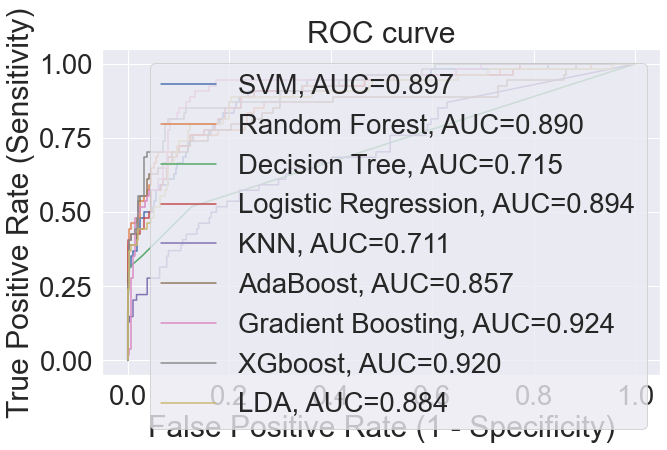

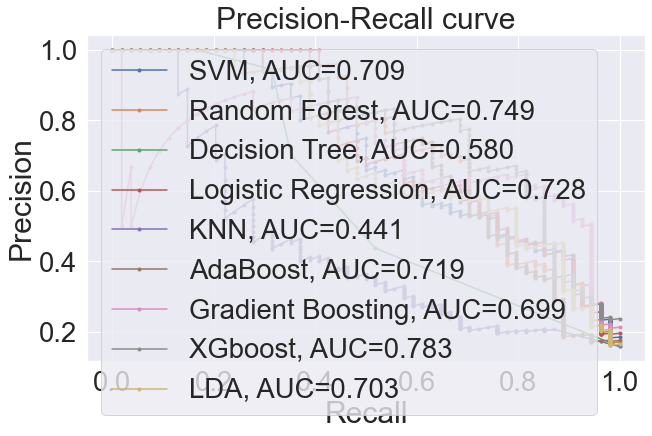

In [68]:
#Object oriented tropos gia na ftiakseis plot.Den einai kamia filisofia.Oi prwtes 2 mi sxoliasmenes grammes einai auto pou ginetai sto background otan les plt.plot
#Diladi arxika dimioyrgeitai ena object tupou figure kai meta tou dinontai diastaseis(Tis pairnei default an den tis orisoume). O katwthi sxoliasmenos kwdika kanei akrivws 
#ta idia pramata
'''plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)'''
fig = plt.figure(figsize=(10,6))  # a new figure window
ax = fig.add_subplot(1, 1, 1)
ax.set_title('ROC curve')
ax.set_xlabel('False Positive Rate (1 - Specificity)')
ax.set_ylabel('True Positive Rate (Sensitivity)')
ax.grid(True)


fig2 = plt.figure(figsize=(10,6))
ax2 = fig2.add_subplot(1, 1, 1)
ax2.set_title('Precision-Recall curve')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')


for c in classifiers:
    clf=c["classifier"]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_true=y_test
    print("classification report for {}\n".format(c["name"]))
    print(classification_report(y_test,y_pred))

    yhat = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
    yhat = yhat[:, 1]

#plot roc curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat)
    ax.plot(fpr, tpr,label=c["name"]+", AUC=%.3f" % auc(fpr, tpr))
    ax.legend()

#plot precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, yhat)
    ax2.plot(recall, precision, marker='.', label=c["name"]+", AUC=%.3f" % auc(recall, precision))
    ax2.legend()

#finally print Area Under the Curve of each precision-recall curve
    print("AUC=%.3f" % auc(recall, precision))        

In [67]:
plt.rcParams.update({'font.size': 10})

In [ ]:
#ΟΤΑΝ ΧΡΗΣΙΜΟΠΟΙΩ PIPELINE ΔΙΝΩ ΠΑΝΤΑ ΣΑΝ ΠΑΡΑΜΕΤΡΟ ΟΛΟ ΤΟ Χ ΚΑΙ Υ ΚΑΙ ΑΝΑΛΑΜΒΑΝΕΙ ΤΟ PIPELINE TA ΥΠΟΛΟΙΠΑ
steps = [('over', RandomOverSampler(sampling_strategy='minority')), ('model',SVC(kernel='linear'))]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2=cross_validate(pipeline,x,y, cv=cv,scoring=scoring,n_jobs=-1)
print(scores2)

NameError: name 'scoring' is not defined